In [40]:
import os
import sys


%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
IF_LOG = True

In [60]:
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm

In [41]:
from utils import get_time_period, get_all_score
sales = get_time_period(start="2016-08-01", end="2016-10-31", log2=IF_LOG)
predit_days = 14
sales_X = sales.ix[-3*predit_days:-predit_days]
sales_Y = sales.ix[-predit_days:]

In [42]:
X = sales_X.values.transpose()
X.shape

(1549, 28)

In [43]:
Y = sales_Y.values.transpose()
Y.shape

(1549, 14)

In [58]:

regr_all = DecisionTreeRegressor(max_depth=10)
regr_all.fit(X, Y)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [45]:
pred_Y = regr_all.predict(X)
get_all_score(pred_Y, Y, log2=IF_LOG)

0.04850242962160143

In [46]:
pct = 0.8
train_label = np.random.choice(Y.shape[0], int(Y.shape[0]*pct))
test_label = np.array([i for i in range(Y.shape[0]) if i not in train_label])

train_X = X[train_label,:]
train_Y = Y[train_label,:]

test_X = X[test_label,:]
test_Y = Y[test_label,:]

In [59]:
regr_cv = RandomForestRegressor()
regr_cv.fit(train_X, train_Y)

ValueError: bad input shape (1239, 14)

In [48]:
pred_Y = regr_cv.predict(test_X)
get_all_score(pred_Y, test_Y, log2=IF_LOG)

0.11296553171470022

In [49]:
def test_train_score(test_X, test_Y, train_X, train_Y, depth_range=range(2,21)):
    train_score= []
    test_score = []
    for depth in depth_range:
        regr_cv = DecisionTreeRegressor(max_depth=depth)
        regr_cv.fit(train_X, train_Y)
        pred_train_Y = regr_cv.predict(train_X)
        train_score.append(get_all_score(pred_train_Y, train_Y, log2=IF_LOG))
        pred_test_Y = regr_cv.predict(test_X)
        test_score.append(get_all_score(pred_test_Y, test_Y, log2=IF_LOG))
    return train_score, test_score

In [50]:
train_score, test_score = test_train_score(test_X, test_Y, train_X, train_Y)

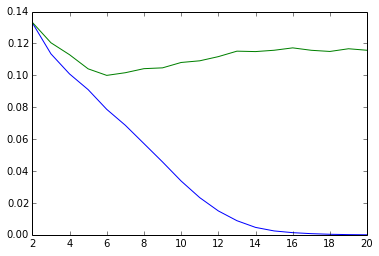

In [51]:
plt.plot(range(2,21), train_score)
plt.plot(range(2,21), test_score)

In [52]:
min(test_score)

0.099991302497049281

In [57]:
me = 4.3904183267
va = 0.793628715368
get_all_score(np.random.normal(me, va, (1000,14)), np.random.normal(me, va, (1000,14)))

0.28553806038379725